In [11]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [12]:
# e,pi,m,c
# K = e**3 / (2*pi*m**2*c**4)

###### $K = e^3 / (2*\pi*m^2*c^4)$ \
##### 1.  $RM(x) = K \int^l_0(\frac{xnB_{\phi}}{(x^2+y^2)^{1/2}}+nB_z\ctg(\theta))dy$
###### $RM_e(x) = (RM(x)+RM(-x))/2$, $RM_o(x) = (RM(x) - RM(-x))/2$
##### 2.1  $RM_e(x) = K \ctg\theta \int^l_0 (nB_z)dy$
##### 2.2  $RM_o(x) = K \int^l_0 (\frac{xnB_{\phi}}{(x^2+y^2)^{1/2}})dy$
###### делаем замену $y -> \rho = (x^2 + y^2)^{1/2}$ 
##### 3.1  $\frac{RM_e(x)}{K \ctg\theta} = \int^{\rho_0}_x \frac{\rho n B_z(\rho)}{(\rho^2-x^2)^{1/2}} d\rho $
##### 3.2  $\frac{RM_o(x)}{K x} = \int^{\rho_0}_x \frac{n B_{\phi}(\rho)}{(\rho^2-x^2)^{1/2}} d\rho $
###### Теперь приводим к классическому виду уравнения Абеля: подстановка $t = 1 - (x/\rho_0)^2\  and\ s = 1 - (\rho/\rho_0)^2 $
##### 4.1  $I_1 = \frac{2RM_e(t)}{\rho_0 K \ctg\theta} = \int^{t}_0 \frac{n B_z(s)}{(t-s)^{1/2}} ds$
##### 4.2  $I_2 = \frac{2RM_o(t)}{\rho_0 K (1-t)^{1/2}} = \int^{t}_0 \frac{n B_{\phi}(s)(1-s)^{-1/2}}{(t-s)^{1/2}} ds$

###### Теперь обратное преобразование:
##### 5. Уравнение  $g(t) = \int^t_0 \frac{f(s)}{(t-s)^{1/2}}ds$ 
##### 6. Можно решить инверсией: $f(s) = \frac{1}{\pi} \frac{d}{ds} \int^s_0 \frac{g(t)}{(s-t)^{1/2}}dt$

# 

In [35]:
# Решение чисто Абеля (п 5):
def abel_transform_direct(f, t, s_min=0.0):
    """
    Вычисляем функцию g(t) = \int^t_0 (f(s) / (t-s)^1/2) ds

    Args:
        f: исходная функция f(s) 
        t: переменная t для которой вычисляется g(t)
        s_min: нижний предел интегрирования (обычно 0.0)
    """
    def integrand(s):
        return f(s) / np.sqrt(t-s)
    
    g_t, err = quad(integrand, s_min, t, points=[t], limit = 100)
    return g_t, err

# Функция для вычисления g(t) на массиве точек
def abel_transform_direct_array(f, t_array, s_min=0.0):
    """
    Вычисляет прямое преобразование Абеля для массива t значений
    """
    return np.array([abel_transform_direct(f, t, s_min)[0] for t in t_array])

Тест 1: f(s) = 1
t	Численный g(t)	Аналитический g(t)	Погрешность
0.1	0.632456		0.632456		0.000000
0.3	1.115547		1.115547		0.000000
0.5	1.445299		1.445299		0.000000
0.7	1.712698		1.712698		0.000000
0.9	1.943651		1.943651		0.000000
1.2	2.149935		2.149935		0.000000
1.4	2.338090		2.338090		0.000000
1.6	2.512192		2.512192		0.000000
1.8	2.674987		2.674987		0.000000
2.0	2.828427		2.828427		0.000000


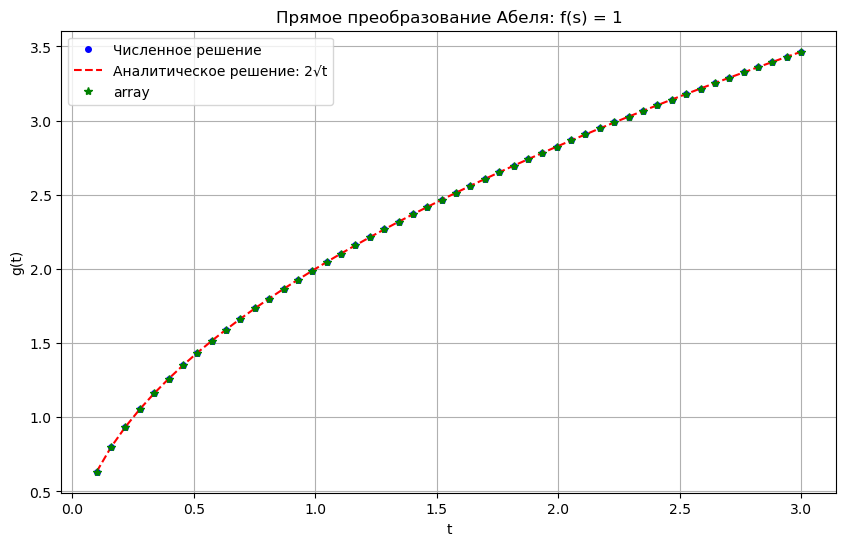

In [43]:
def test_case_1(s):
    """f(s) = 1 -> g(t) = 2√t"""
    return 1.0
def analytical_g1(t):
    return 2 * np.sqrt(t)

# Сравнение численного и аналитического решений
t_points = np.linspace(0.1, 2.0, 10)  # Избегаем t=0 из-за сингулярности

print("Тест 1: f(s) = 1")
print("t\tЧисленный g(t)\tАналитический g(t)\tПогрешность")
for t in t_points:
    g_num = abel_transform_direct(test_case_1, t)[0]
    g_anal = analytical_g1(t)
    
    print(f"{t:.1f}\t{g_num:.6f}\t\t{g_anal:.6f}\t\t{error:.6f}")

g_num2 = abel_transform_direct_array(test_case_1, t_points)

# Визуализация для одного тестового случая
t_plot = np.linspace(0.1, 3.0, 50)
g_numerical = [abel_transform_direct(test_case_1, t)[0] for t in t_plot]
g_analytical = analytical_g1(t_plot)

plt.figure(figsize=(10, 6))
plt.plot(t_plot, g_numerical, 'bo', markersize=4, label='Численное решение')
plt.plot(t_plot, g_analytical, 'r--', label='Аналитическое решение: 2√t')
plt.plot(t_plot, abel_transform_direct_array(test_case_1, t_plot), 'g*', label='array')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Прямое преобразование Абеля: f(s) = 1')
plt.legend()
plt.grid(True)
plt.show()